# Анализ анкетных данных фитнесс-центра

Целью проекта является повышение качества работы с клиентами. Для выполнения цели необходимо решить следующие задачи: <div>1. Посчитать вероятность оттока клиентов на месяц вперед.
<div>2. Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства.
<div>3. Проанализировать основные признаки, наиболее сильно влияющие на отток.
<div>4. Сформулировать выводы и рекомендации. 
<div>Данные для работы предоставлены заказчиком. Данные обработаны от пропусков, дубликатов и приведены к соответствующим типам. Они содержат данные на месяц до оттока и факт оттока на определенный месяц. 

## Обзор данных
Импортируем необходимые библиотеки, загружаем данные в переменные.

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage

# прочитаем из csv-файла данные
df = pd.read_csv('C:\\Users\\algol\\Downloads\\gym_churn.csv')
df.describe()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Отсутствующих признаков нет. В среднем абонемент покупают на 4,5 месяца. Средний возраст 29 лет. Среднее время удержания 3,7 (lifetime) месяца. 

Таблица содержит следующие столбцы:
<div>Данные клиента за предыдущий до проверки факта оттока месяц:
<div>'gender' — пол;
<div>'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
<div>'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
<div>'Phone' — наличие контактного телефона;
<div>'Age' — возраст;
<div>'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
<div>Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
<div>'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
<div>'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
<div>'Group_visits' — факт посещения групповых занятий;
<div>'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
<div>'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
<div>'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
<div>'Churn' — факт оттока в текущем месяце.

## Исследовательский анализ данных

### Средние значения признаков в зависимости от оттока

In [2]:
#найдем средние значения признаков для тех кто ушел и остался.
mean = df.groupby('Churn').mean()
display(mean)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Сравнение средних показывает: <div>1. Сотрудники компаний-партнеров и/или пришедшие по промо-коду меньше уходили в текущем месяце. <div>2. Те кто имеет более длительный период абонемента меньше уходили в текущем месяце.  <div>3. Те кто имеет длительный срок удержания и/или большее количество времени до истечения абонемента значительно меньше уходили в текущем месяце.

### Распределения признаков в зависимости от оттока

Text(0.5, 1.0, 'Avg_class_frequency_current_month')

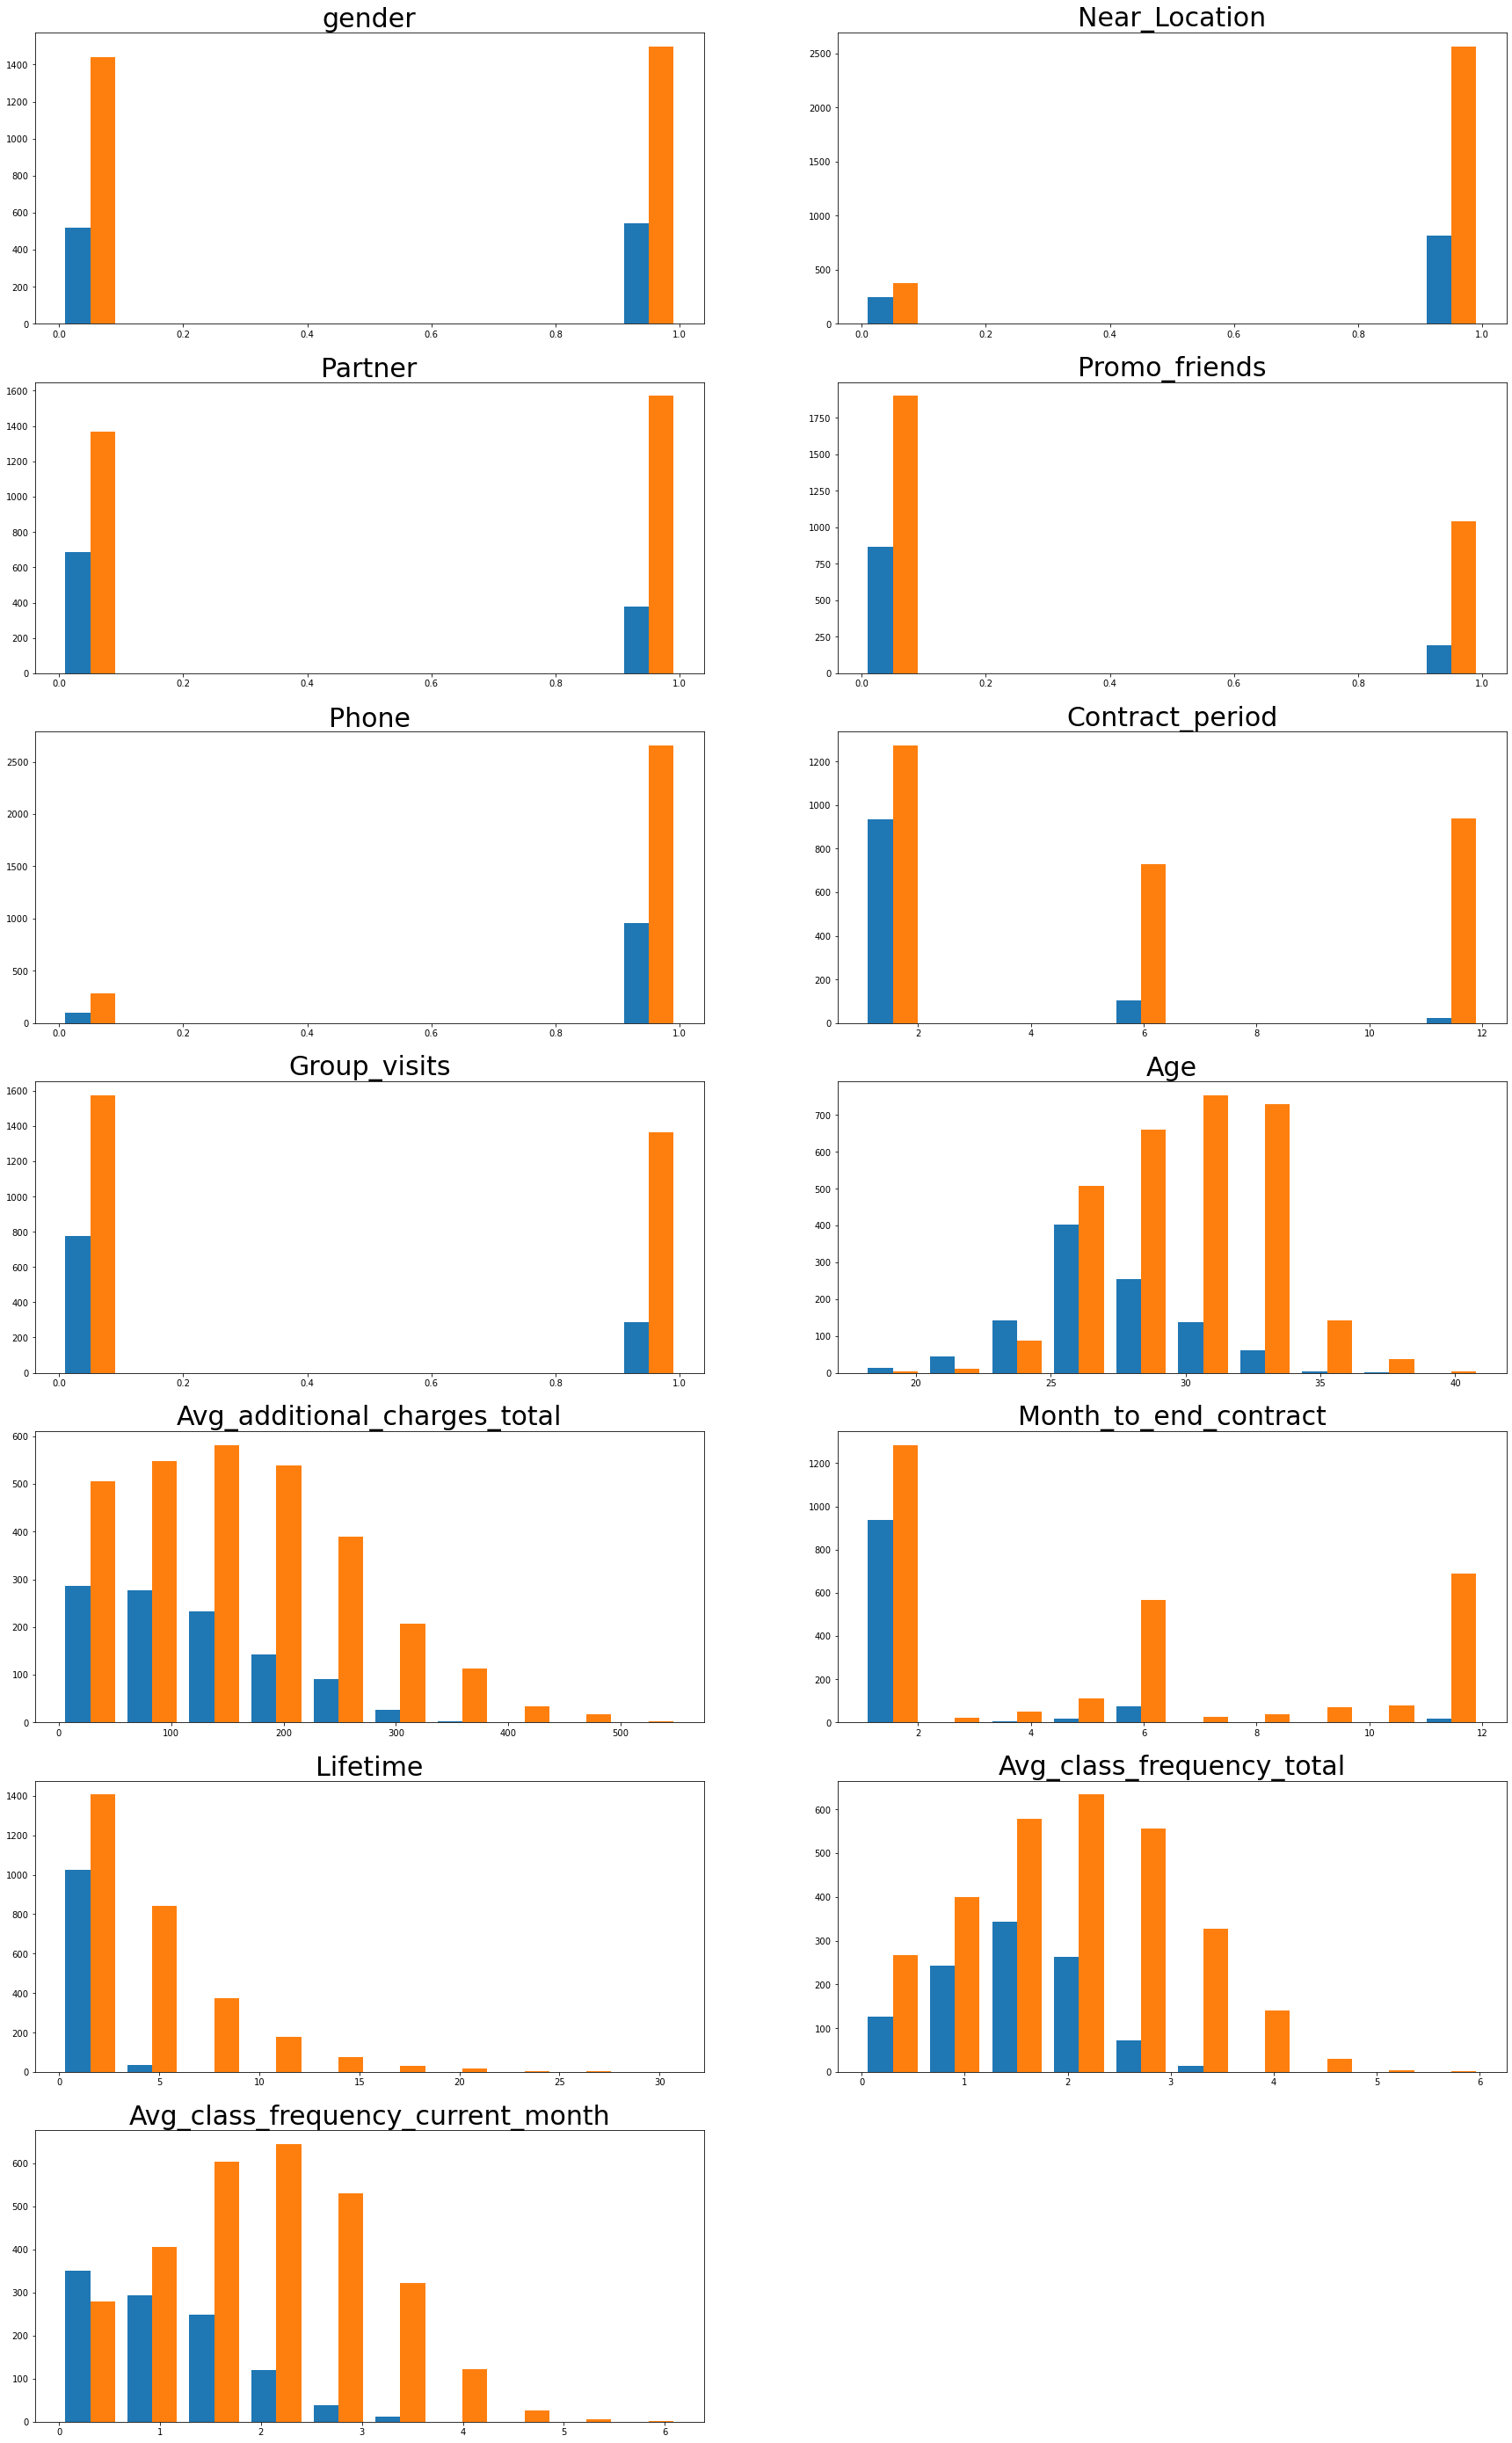

In [3]:
#построим распределения признаков в зависимости от оттока.
#сделаем срезы данных для ушедших и оставшихся.
churn = df.query('Churn == 1')
stay = df.query('Churn == 0')
#построим графики
plt.figure(figsize=(30, 50))

plt.subplot(7, 2, 1)
plt.hist([churn['gender'], stay['gender']])
plt.title("gender", fontsize = 30) 

plt.subplot(7, 2, 2)
plt.hist([churn['Near_Location'], stay['Near_Location']])
plt.title("Near_Location", fontsize = 30)

plt.subplot(7, 2, 3)
plt.hist([churn['Partner'], stay['Partner']])
plt.title("Partner", fontsize = 30)

plt.subplot(7, 2, 4)
plt.hist([churn['Promo_friends'], stay['Promo_friends']])
plt.title("Promo_friends", fontsize = 30)

plt.subplot(7, 2, 5)
plt.hist([churn['Phone'], stay['Phone']])
plt.title("Phone", fontsize = 30)

plt.subplot(7, 2, 6)
plt.hist([churn['Contract_period'], stay['Contract_period']])
plt.title("Contract_period", fontsize = 30)

plt.subplot(7, 2, 7)
plt.hist([churn['Group_visits'], stay['Group_visits']])
plt.title("Group_visits", fontsize = 30)

plt.subplot(7, 2, 8)
plt.hist([churn['Age'], stay['Age']])
plt.title("Age", fontsize = 30)

plt.subplot(7, 2, 9)
plt.hist([churn['Avg_additional_charges_total'], stay['Avg_additional_charges_total']])
plt.title("Avg_additional_charges_total", fontsize = 30)

plt.subplot(7, 2, 10)
plt.hist([churn['Month_to_end_contract'], stay['Month_to_end_contract']])
plt.title("Month_to_end_contract", fontsize = 30)

plt.subplot(7, 2, 11)
plt.hist([churn['Lifetime'], stay['Lifetime']])
plt.title("Lifetime", fontsize = 30)

plt.subplot(7, 2, 12)
plt.hist([churn['Avg_class_frequency_total'], stay['Avg_class_frequency_total']])
plt.title("Avg_class_frequency_total", fontsize = 30)

plt.subplot(7, 2, 13)
plt.hist([churn['Avg_class_frequency_current_month'], stay['Avg_class_frequency_current_month']])
plt.title("Avg_class_frequency_current_month", fontsize = 30)


На всех графиках синий столбец это ушедшие клиенты, а оранжевый - оставшиеся. Можно сделать следующие предварительные выводы:
<div>1. Чем длинее период абонемента и чем больше времени до его окончания, тем больше оставшихся клиентов. 
<div>2. Чем старше клиенты, тем больше среди них оставшихся.
<div>3. Чем больше клиенты тратят на дополнительные услуги, тем больше среди таких клиентов оставшихся. 
<div>4. Клиенты которые ходят 1 и более раз в неделю уходят меньше.
    

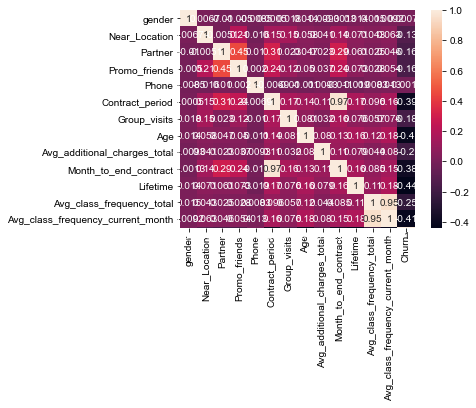

In [4]:
#Построим матрицу корреляций и тепловую карту
cm = df.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots()

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True) #ваш код здесь
sns.set(rc = {'figure.figsize':(30,30)})
ax.set_ylim(
    13, 0
)  # корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

<div>1. Заметна корреляция между длительностью абонемента и сроком до окончания, но эта корреляция не инфомативна, т.к. оба фактора взаимно обусловлены. 
<div>2. То же самое можно сказать по поводу корреляций по частоте посещений за месяц и за все время.     
<div>3. Тепловая карта показывает, что за исключением пп.1 и 2 корреляций между параметрами нет. Для обучения модели по одному параметру из пунктов 1 и 2 нужно будет удалить.     

In [5]:
#удалим по одному из скоррелированных признаков
df = df.drop(columns = ['Contract_period', 'Avg_class_frequency_current_month'])
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.020398,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.922936,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.859098,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.205633,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,0


## Построим модель прогнозирования оттока клиентов


### Построим модель логистической регрессии

In [6]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']

# разделяем данные на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# стандартизируем данные методом StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для нашей модели
model = LogisticRegression(solver='liblinear', random_state = 0)

# обучим модель
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]

# выведем значения predictions и probabilities на экран
#print(predictions)
#print(probabilities)

Для оценки работы модели вычислим метрики. 

In [7]:
print('Метрики для модели логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Метрики для модели логистической регрессии
Accuracy: 0.90
Precision: 0.79
Recall: 0.81


### Построим модель случайного леса

In [8]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1] 

# выведем все изученные метрики для полученного прогноза
print('Метрики для модели случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))


Метрики для модели случайного леса
Accuracy: 0.90
Precision: 0.80
Recall: 0.77


Модель случайного леса лучше по метрике Recall, чем модель логистической регрессии. 

## Кластеризация клиентов

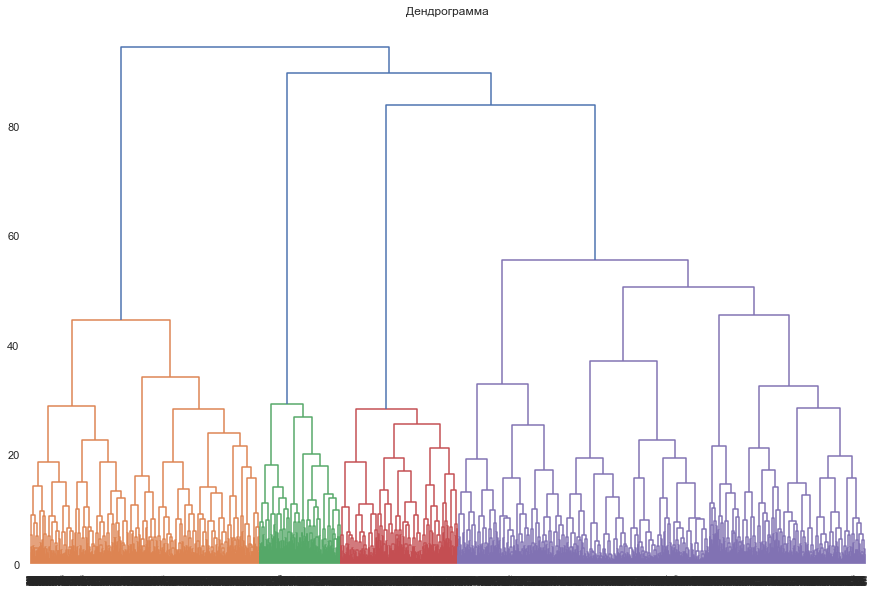

In [9]:
# стандартизируем данные включающие только признаки 
X_st = scaler.fit_transform(X) 
linked = linkage(X_st, method = 'ward')
#построим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

Предложенное оптимальное число кластеров 4 - четыре цвета на дендрограмме. 

In [10]:
#импортируем метод K-Means
from sklearn.cluster import KMeans
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_st)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
print(df.groupby(['cluster_km']).mean())

              gender  Near_Location   Partner  Promo_friends  Phone  \
cluster_km                                                            
0           0.498501       0.995005  0.889111       1.000000    1.0   
1           0.500898       0.000000  0.488330       0.077199    1.0   
2           0.521158       0.995546  0.417595       0.011136    1.0   
3           0.512090       1.000000  0.196891       0.053541    1.0   
4           0.523316       0.862694  0.471503       0.305699    0.0   

            Group_visits        Age  Avg_additional_charges_total  \
cluster_km                                                          
0               0.519481  29.543457                    152.139417   
1               0.231598  28.685817                    137.277472   
2               0.546771  30.805122                    177.103564   
3               0.297064  27.818653                    124.625600   
4               0.427461  29.297927                    144.208179   

            Month_

Распределение по признаку  Age
Распределение по признаку  Avg_additional_charges_total
Распределение по признаку  Lifetime
Распределение по признаку  Avg_class_frequency_total
Распределение по признаку  Month_to_end_contract


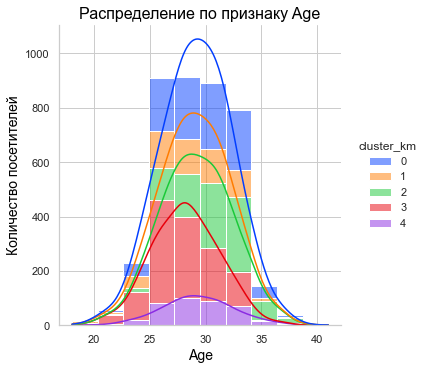

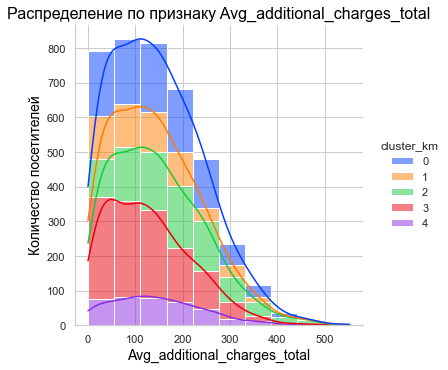

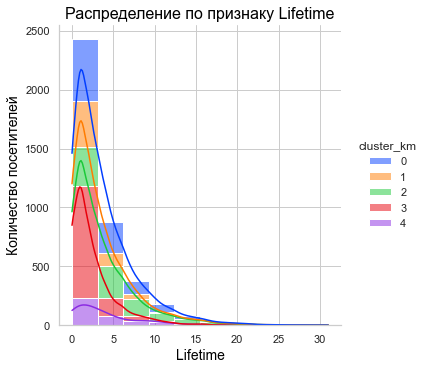

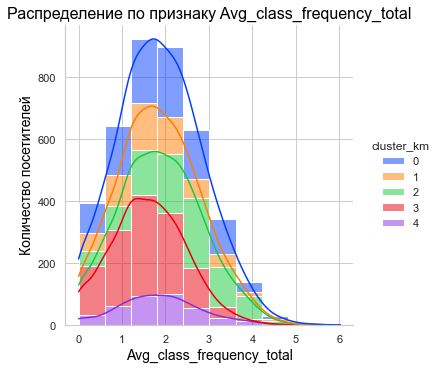

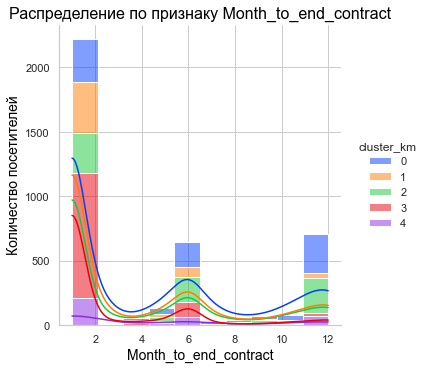

In [11]:
#построим распределение по кластерам для небинарных признаков
for name in [
   'Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total', 'Month_to_end_contract']:
    print('Распределение по признаку ', name)
    sns.set_style("whitegrid")
    sns.displot(data = df, x = name, hue = 'cluster_km', kde=True, palette='bright', multiple = 'stack', bins = 10) 
    plt.title('Распределение по признаку '  +name, fontsize = 16, color = 'black')
    plt.ylabel('Количество посетителей', fontsize = 14, color = 'black')
    plt.xlabel(name, fontsize = 14, color = 'black')
    #plt.figure(figsize=(20,10))
plt.show()

Наибольшее количество посетителей имеют кластеры под номерами 0 и 3. 

Распределение по признаку  gender
Распределение по признаку  Near_Location
Распределение по признаку  Partner
Распределение по признаку  Promo_friends
Распределение по признаку  Phone
Распределение по признаку  Group_visits
Распределение по признаку  Churn


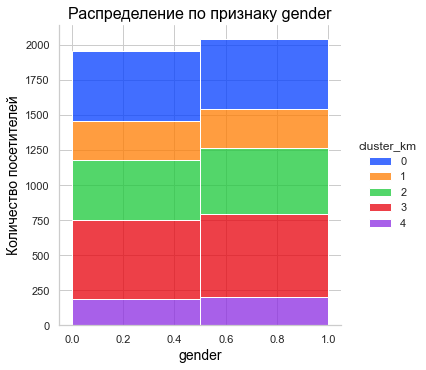

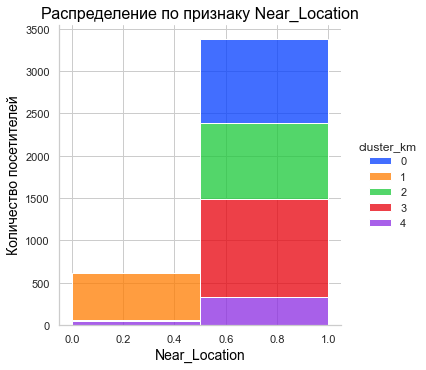

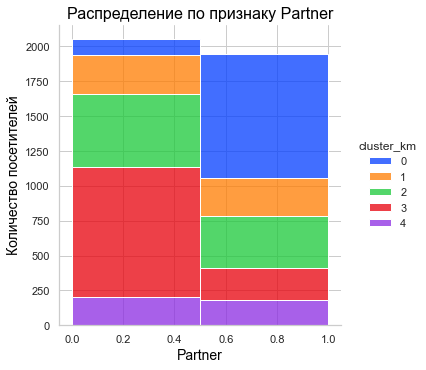

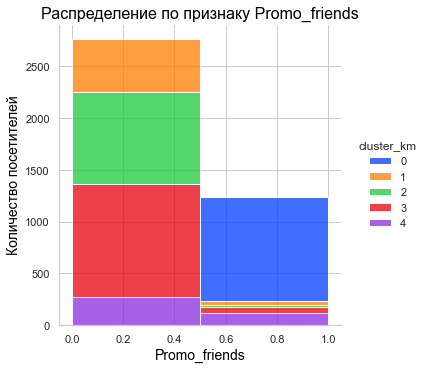

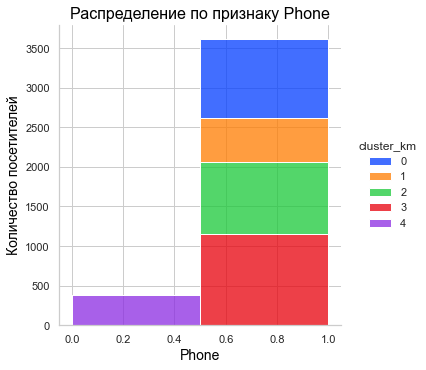

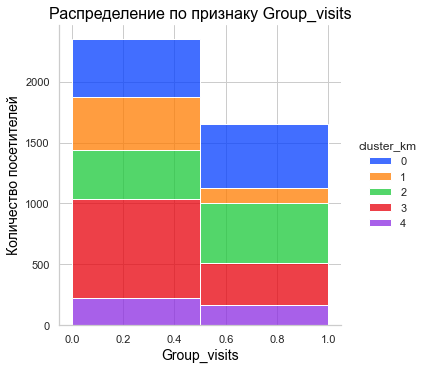

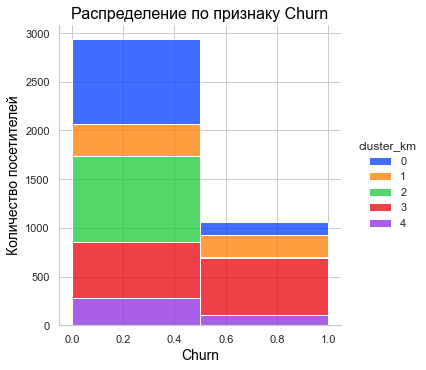

In [12]:
#построим распределение по кластерам для бинарных признаков
for name in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']:
    print('Распределение по признаку ', name)
    sns.set_style("whitegrid")
    sns.displot(data = df, x = name, hue = 'cluster_km', palette='bright', multiple = 'stack', bins = 2)
    plt.title('Распределение по признаку '  +name, fontsize = 16, color = 'black')
    plt.ylabel('Количество посетителей', fontsize = 14, color = 'black')
    plt.xlabel(name, fontsize = 14, color = 'black')
    #plt.figure(figsize=(18,5))
plt.show()

Наибольшее количество посетителей имеют кластеры под номерами 0 и 3. 

In [13]:
#посчитаем долю оттока для каждого кластера в отдельности
print(df.groupby('cluster_km').agg({'Churn': 'sum'})/df.groupby('cluster_km').agg({'Churn': 'count'}))

               Churn
cluster_km          
0           0.132867
1           0.402154
2           0.016704
3           0.506045
4           0.266839


Наибольший отток показывают кластеры под номерами 1, 3 и 4. 

Выводы:
<div> 1. Наибольшее количество посетителей входят в кластеры 0 и 3. 
<div> 2. Наибольший отток показывают кластеры под номерами 1, 3 и 4.
<div> 3. В кластере 0 наибольшее количество посетителей с небольшим оттоком. Именно параметры этого кластера можно использовать как точку роста. Анализ средних значений указаывает, что в этом кластере наибольшие средние по признакам Partner и Promo_friends.    
<div> 4. Сотрудники компаний-партнеров и/или пришедшие по промо-коду меньше уходили в текущем месяце. <div>5. Те кто имеет более длительный период абонемента меньше уходили в текущем месяце.  <div>6. Те кто имеет длительный срок удержания и/или большее количество времени до истечения абонемента значительно меньше уходили в текущем месяце.
<div> Рекомендации:
<div> 1. Для построения прогнозов лучше использовать модель случайного леса.
<div> 2. Учитывая, что кластер 0 имеет имеет небольшой отток, а наибольшие средние для этого кластера имеют признаки Partner и Promo_friends значит для удержания клиентов нужно усиливать работу с компаниями-партнерами и регулярно проводить акции "Приведи друга".   